<a href="https://colab.research.google.com/github/KLeeDE/Data-Science/blob/master/Taxis%20and%20Ride-hailing%20Apps%20in%20New%20York%20City.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSTEP20 // Assignment #3

assigned : **Jan 23, 2020**

DUE : **Jan 29, 2020 11:59pm**

## Taxis and Ride-hailing Apps in New York City

<img src="http://energyfuse.org/wp-content/uploads/2018/06/130826124911-uber-taxi-app.jpg" width=500>

---

### PART 1 – Background **(10 points)**

Good data science (and data analysis more generally) depends on a clear understanding of the underlying problem/situation, the methods by which the data you are about to analyze are collected, and the situational context in which that data sits.  To that end:

**<u>In your own words</u>, provide a brief (no more than 500 words) descriptive overview of the rise of ride-hailing apps and their effects on traditional taxis in urban environments.**

**Please include *references* within the description via weblinks.**


The ride-hailing service (RHS), such as Uber, Lyft, Sidecar, Hailo, Didi Kaudi, became one of the predominant transports in 2010s. A mechanism of RHS works as a traveler request a driver for a ride through smartphone app with the support of GPS, technology, digital map, and routing algorithms with real-time information. Since the introduction of [Uber](https://en.wikipedia.org/wiki/Uber) as one of the first services in RHSs in 2009, the usage has been increased so significantly that the commuter rail service is a 3% net increase in use and the average net change in transit use is a 6% reduction among Americans in major cities [(Clewlow, & Mishra, 2017)](https://escholarship.org/uc/item/82w2z91j). 

Some scholars analyzed the reasons why RHSs has become popular based on consumer characteristics analysis. By comparing the socioeconomic and trip characteristics of ride-hailing used to that of other mode users, [Young, & Farber (2018)](https://www.sciencedirect.com/science/article/abs/pii/S096585641830764X) found that a wealthy younger generation usually used RHS instead of taxis and public transit because of convenience and low prices, and concluded that ride-hailing may effectively reduce drunk-driving and will have more effect on the level of ridership of other modes. [Cramer, & Krueger (2016)](https://www.aeaweb.org/articles?id=10.1257/aer.p20161002) also found that consumers evaluate the RHS is more efficient than taxi in that UberX drivers spend a significantly higher fraction of their time and drive a substantially higher share of miles with a passenger. 

As the RHS became predominant in transportation sector, their effects on traditional taxis is reported to be significantly large in urban environments. According to [Clewlow, & Mishra (2017)](https://escholarship.org/uc/item/82w2z91j), there is agreement on one issue that ride-hailing services have begun to disrupt traditional transportation systems, such as taxis, in urban cities across the globe. However, while the RHS compete with traditional taxis, there is limited information and data about RHS affect transportation decisions and travel patterns ([Cramer, & Krueger, 2016](https://www.aeaweb.org/articles?id=10.1257/aer.p20161002); [Clewlow, & Mishra, 2017](https://escholarship.org/uc/item/82w2z91j)).

Therefore, it is important for municipal governments to analyze how ride-hailing will affect traditional taxis in urban cities. For instance, in Vancouver, Canada, nine B.C. taxi companies filed a petition at the B.C. Supreme Court, asking it to quash ride-hailing licenses [(Doering, 2020)](https://www.citynews1130.com/2020/01/28/accessible-taxi-dispute/). As a result, given the rapid growth of RHS, it has become important for cities to consider the growth of RHSs and their effects on taxis in their planning going forward  [(Conway et al., 2018)](https://www.mdpi.com/2413-8851/2/3/79).

**References:**

Clewlow, R. R., & Mishra, G. S. (2017). Disruptive transportation: The adoption, utilization, and impacts of ride-hailing in the United States. 

Conway, M. W., Salon, D., & King, D. A. (2018). Trends in taxi use and the advent of ridehailing, 1995–2017: Evidence from the US National Household Travel Survey. Urban Science, 2(3), 79.

Cramer, J., & Krueger, A. B. (2016). Disruptive change in the taxi business: The case of Uber. American Economic Review, 106(5), 177-82.

Young, M., & Farber, S. (2019). The who, why, and when of Uber and other ride-hailing trips: An examination of a large sample household travel survey. Transportation Research Part A: Policy and Practice, 119, 383-392.


Doering, K. (2020, Jan 28). Taxis threaten to scrap accessible vehicles over ride-hailing dispute, vulnerable people caught in middle. City News. Retrieved 01/28/2020 from: https://www.citynews1130.com/2020/01/28/accessible-taxi-dispute/


### PART 2 – Exploring Taxi/Ride-hailing Data **(10 points)**




**Reading: "[Analyzing 1.1 Billion NYC Taxi and Uber Trips, with a Vengeance](https://toddwschneider.com/posts/analyzing-1-1-billion-nyc-taxi-and-uber-trips-with-a-vengeance/)"**

The open TLC (Taxi & Limousine Commission) data in NYC can be found through the NYC TLC's official [website](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page), however the data is very large and a bit cumbersome, and so we will work with a pre-processed and aggregated CSV file from [Todd W. Schneider](https://toddwschneider.com/about/).  That CSV of the data can be found [here](https://github.com/toddwschneider/nyc-taxi-data/blob/master/analysis/2017_update/data/daily_trips_by_geography.csv?raw=true).

<b>Provide a descriptive overview of the dataset.  Some characteristics to include are:

- a description of what the values in each column represent (i.e., create a data dictionary);

- summary statistics of the data;

- plots (with appropriate captions and axis labels) summarizing the data that show relationships between various columns (e.g., rides of various types over time, bar charts with relative total numbers, scatterplots of various types of vehicles or types of trips with each other etc.</b>

In [0]:
!pip install sodapy

import numpy as np
import pandas as pd
import statsmodels.formula.api as sm 
import sodapy 
from sodapy import Socrata

In [0]:
fname = "https://raw.githubusercontent.com/toddwschneider/nyc-taxi-data/master/analysis/2017_update/data/daily_trips_by_geography.csv"
tlc = pd.read_csv(fname)
cols = tlc.columns[:10]
tlc = tlc[cols]
print(tlc)

           car_type        date  ...        parent_type  monthly_is_estimated
0              Gett  2016-04-01  ...  Ride-hailing apps                  True
1              Gett  2016-04-02  ...  Ride-hailing apps                  True
2              Gett  2016-04-03  ...  Ride-hailing apps                  True
3              Gett  2016-04-04  ...  Ride-hailing apps                  True
4              Gett  2016-04-05  ...  Ride-hailing apps                  True
...             ...         ...  ...                ...                   ...
51775  Yellow taxis  2017-12-27  ...              Taxis                 False
51776  Yellow taxis  2017-12-28  ...              Taxis                 False
51777  Yellow taxis  2017-12-29  ...              Taxis                 False
51778  Yellow taxis  2017-12-30  ...              Taxis                 False
51779  Yellow taxis  2017-12-31  ...              Taxis                 False

[51780 rows x 8 columns]


In [0]:
# -- a description of what the values in each column represent (i.e., create a data dictionary);
print("(1) Car type column refers to the transportation sectors used in NYC")
print("(2) geo column refers to types of getting off")
print("(3) Trips column is a one-way trip to go to the get off")
print("(4) Monthly column is trailing 28 days which is always the same number of weekdays + weekends ")
print("(5) Parent type refers to types of transportation based on car type")
print("(6) Monthly is estimated column is only relevant for Juno and Gett")


(1) Car type column refers to the transportation sectors used in NYC
(2) geo column refers to types of getting off
(3) Trips column is a one-way trip to go to the get off
(4) Monthly column is trailing 28 days which is always the same number of weekdays + weekends 
(5) Parent type refers to types of transportation based on car type
(6) Monthly is estimated column is only relevant for Juno and Gett


In [0]:
# -- summary statistics of the data;
print(tlc.dtypes)   
print("")      
print("range of trips = [{0}, {1}]".format(np.min(tlc["trips"]), np.max(tlc["trips"])))
print("mean of trips = {0}".format(np.mean(tlc["trips"])))
print("median of trips = {0}".format(np.median(tlc["trips"])))
print("standard deviation of trips = {0}".format(np.std(tlc["trips"])))
print("")
print(tlc.isna().sum(axis=0))                                                                                                        

car_type                 object
date                     object
geo                      object
trips                   float64
grouping                 object
monthly                 float64
parent_type              object
monthly_is_estimated       bool
dtype: object

range of trips = [0.0, 849414.0]
mean of trips = 89900.52137891078
median of trips = 15639.5
standard deviation of trips = 147211.7897423304

car_type                   0
date                       0
geo                        0
trips                      0
grouping                   0
monthly                 1215
parent_type                0
monthly_is_estimated       0
dtype: int64


In [0]:
tlc = tlc.fillna(0.0)
print(tlc)

           car_type        date  ...        parent_type  monthly_is_estimated
0              Gett  2016-04-01  ...  Ride-hailing apps                  True
1              Gett  2016-04-02  ...  Ride-hailing apps                  True
2              Gett  2016-04-03  ...  Ride-hailing apps                  True
3              Gett  2016-04-04  ...  Ride-hailing apps                  True
4              Gett  2016-04-05  ...  Ride-hailing apps                  True
...             ...         ...  ...                ...                   ...
51775  Yellow taxis  2017-12-27  ...              Taxis                 False
51776  Yellow taxis  2017-12-28  ...              Taxis                 False
51777  Yellow taxis  2017-12-29  ...              Taxis                 False
51778  Yellow taxis  2017-12-30  ...              Taxis                 False
51779  Yellow taxis  2017-12-31  ...              Taxis                 False

[51780 rows x 8 columns]


Text(0, 0.5, 'Total number of trips')

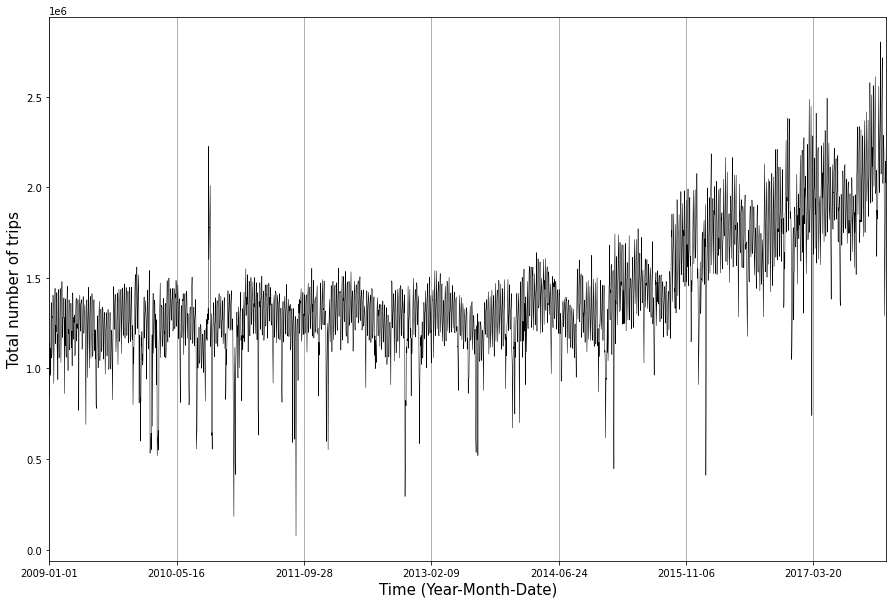

In [0]:
nyc_ts = tlc.groupby("date").sum()

ax = nyc_ts.plot(y=["trips"], color="k", legend=False, use_index=True, figsize=(15,10), lw=0.5)
ax.grid(axis="x", which="major", lw=1)
ax.set_xlabel("Time (Year-Month-Date)", fontsize=15)
ax.set_ylabel("Total number of trips", fontsize=15)

As shown in the figure above, the total number of trips from 2009 to 2017 is increasing in New York City. The graph is showing up and down continuously, however, the slope of the total number of trips is increasing by time.  

In [0]:
tlc_sub1 = tlc.groupby(["car_type", "date"]).sum()
print(tlc_sub1)

                            trips     monthly  monthly_is_estimated
car_type     date                                                  
Gett         2016-04-01    6292.0         0.0                   4.0
             2016-04-02    7015.0         0.0                   4.0
             2016-04-03    5200.0         0.0                   4.0
             2016-04-04    3814.0         0.0                   4.0
             2016-04-05    3817.0         0.0                   4.0
...                           ...         ...                   ...
Yellow taxis 2017-12-27  656196.0  22875686.0                   0.0
             2017-12-28  716391.0  22708452.0                   0.0
             2017-12-29  714511.0  22500633.0                   0.0
             2017-12-30  637206.0  22218660.0                   0.0
             2017-12-31  625770.0  22058680.0                   0.0

[10356 rows x 3 columns]


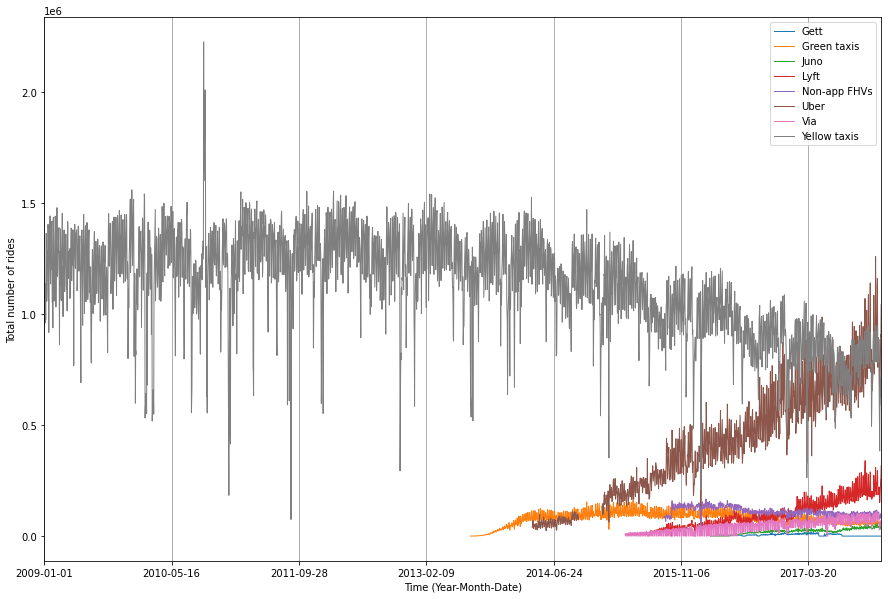

In [0]:
# -- plots (with appropriate captions and axis labels) summarizing the data that show relationships between various columns 
# e.g., rides of various types over time, bar charts with relative total numbers, scatterplots of various types of vehicles or types of trips with each other etc.

# (1) rides of various car types over time
tlc_sub1 = tlc.groupby(["car_type", "date"]).sum()

ax = tlc_sub1.unstack("car_type").plot(y="trips", legend=True, use_index=True, figsize=(15,10), lw=1)
ax.grid(axis="x", which="major", lw=1)
ax.set_xlabel("Time (Year-Month-Date)", fontsize=10)
ax.set_ylabel("Total number of rides", fontsize=10)
ax.legend(loc="upper right")

The graph shown above shows the total number of rides by various car types over time from 2009 to 2017 in New York City . Yellow taxis is showing the most usage of transportation section from 2009 to early 2017. However, after introduction of Ride hailing apps in 2014, Uber has been increased rapidly from 2014 and used more than Yellow taxis in 2017. Lyft is following the Uber. The rest of the sectors (Gett, Green Taxis, Juno, Non-app FHVs, Via) are following after Lyft. The background is described in [Clewlow, & Mishra (2017)](https://escholarship.org/uc/item/82w2z91j). 



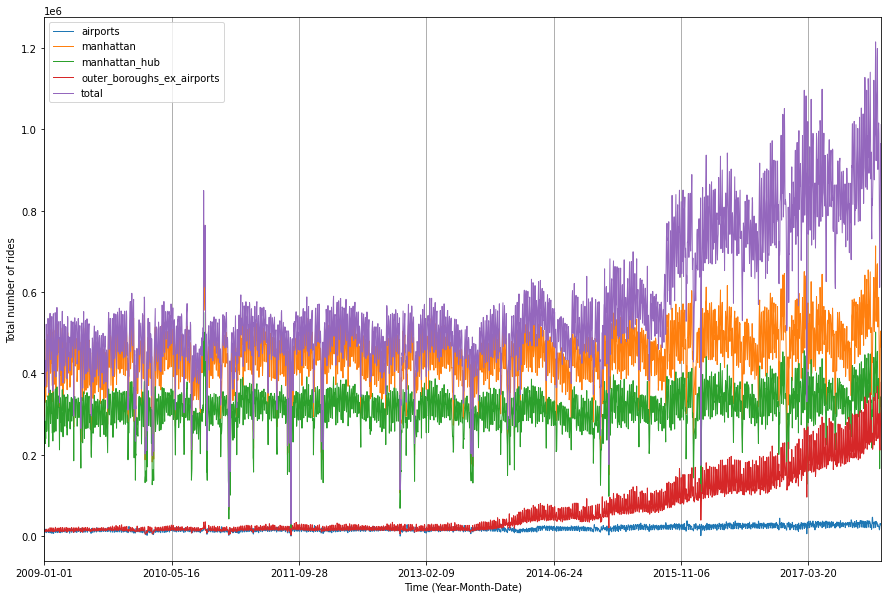

In [0]:
# (2) rides of various get off places over time
tlc_sub = tlc.groupby(["geo", "date"]).sum()

ax = tlc_sub.unstack("geo").plot(y="trips", legend=True, use_index=True, figsize=(15,10), lw=1)
ax.grid(axis="x", which="major", lw=1)
ax.set_xlabel("Time (Year-Month-Date)", fontsize=10)
ax.set_ylabel("Total number of rides", fontsize=10)
ax.legend(loc="upper left")

The graph shown above shows the total number of rides by various get off places by consumers over time from 2009 to 2017 in New York City. As described above, the total number of rides is increased from 2009 to 2017. In particular, Manhattan, Manhattan hub, outer boroughs except airports, and airports are following. Especially, outer boroughs except airports show an increase from 2014 to 2017. The background is described in [Clewlow, & Mishra (2017)](https://escholarship.org/uc/item/82w2z91j). 

### PART 3 – Analysis of Taxi/Ride-hailing Time Series Data **(10 points)**




As we did with time series data in class, we'd like to answer two fundamental questions:

<b>

1. what is the relationship between Taxis and Ride-hailing alternatives in NYC?

2. is there periodicity in the (various kinds of) trip data?

</b>

While we are asking these questions in a very different context, the purpose of these questions is same <small>(note the transferability of these tools across different domains)</small>.  Namely to assess the potential impact of one modality on another, and how might we anticipate resource allocation for demand.

**Using the time series analysis techniques we developed in class, present quantitative evidence with supporting visualizations that address the two questions above.**

In [0]:
tlx = tlc[tlc['parent_type'] == "Taxis"]
tlx_ts = tlx.groupby("date").sum()
print(tlx_ts)

                trips     monthly  monthly_is_estimated
date                                                   
2009-01-01   853117.0         0.0                 False
2009-01-02   984469.0         0.0                 False
2009-01-03  1139152.0         0.0                 False
2009-01-04   961918.0         0.0                 False
2009-01-05   960523.0         0.0                 False
...               ...         ...                   ...
2017-12-27   703253.0  24522777.0                 False
2017-12-28   769206.0  24349200.0                 False
2017-12-29   772333.0  24131346.0                 False
2017-12-30   689934.0  23829318.0                 False
2017-12-31   685615.0  23672073.0                 False

[3287 rows x 3 columns]


In [0]:
tlr = tlc[tlc['parent_type'] == "Ride-hailing apps"]
tlr_ts = tlr.groupby("date").sum()

tlc_sub2 = tlc.groupby(["parent_type", "date"]).sum()
print(tlc_sub2)

                           trips     monthly  monthly_is_estimated
parent_type date                                                  
Other       2015-09-01   83086.0         0.0                   0.0
            2015-09-02   83676.0         0.0                   0.0
            2015-09-03   86886.0         0.0                   0.0
            2015-09-04   91121.0         0.0                   0.0
            2015-09-05   88109.0         0.0                   0.0
...                          ...         ...                   ...
Taxis       2017-12-27  703253.0  24522777.0                   0.0
            2017-12-28  769206.0  24349200.0                   0.0
            2017-12-29  772333.0  24131346.0                   0.0
            2017-12-30  689934.0  23829318.0                   0.0
            2017-12-31  685615.0  23672073.0                   0.0

[5419 rows x 3 columns]


Text(0, 0.5, 'total number of rides')

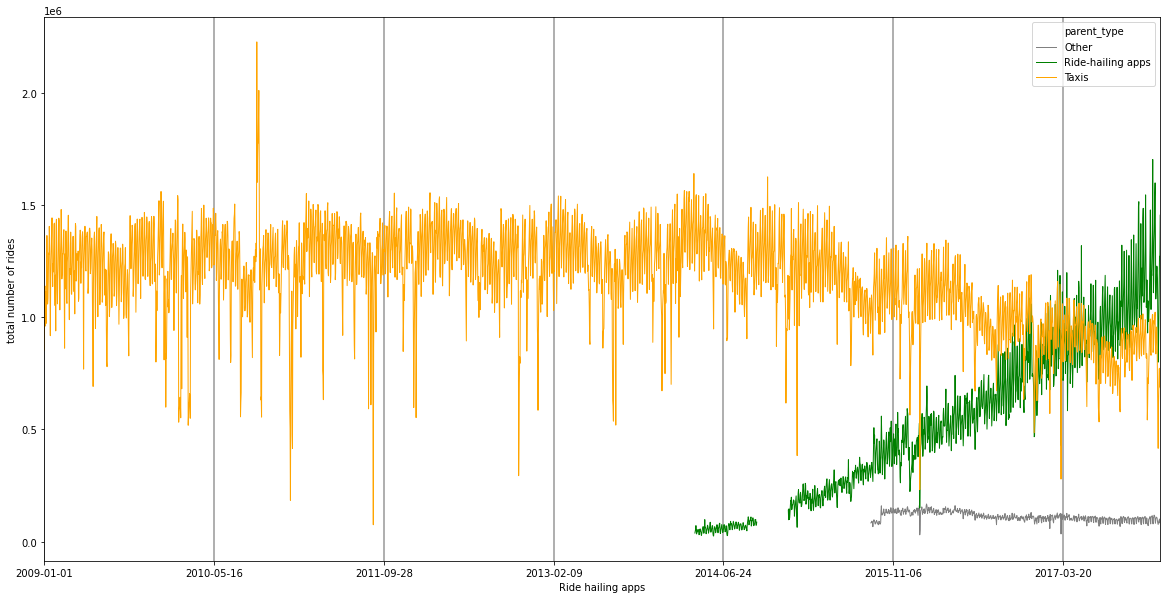

In [0]:
tlc_sub2 = tlc.groupby(["parent_type", "date"]).sum()
ax = tlc_sub2.unstack('parent_type').plot(y="trips", legend=True, color=["gray","green","orange"], figsize=[20,10], lw=1)
ax.grid(axis="x", which="major", lw=2)
ax.grid(axis="x", which="minor", lw=0.5)
ax.set_xlabel("Ride hailing apps")
ax.set_ylabel("total number of rides")

Text(0, 0.5, 'The total number of trips')

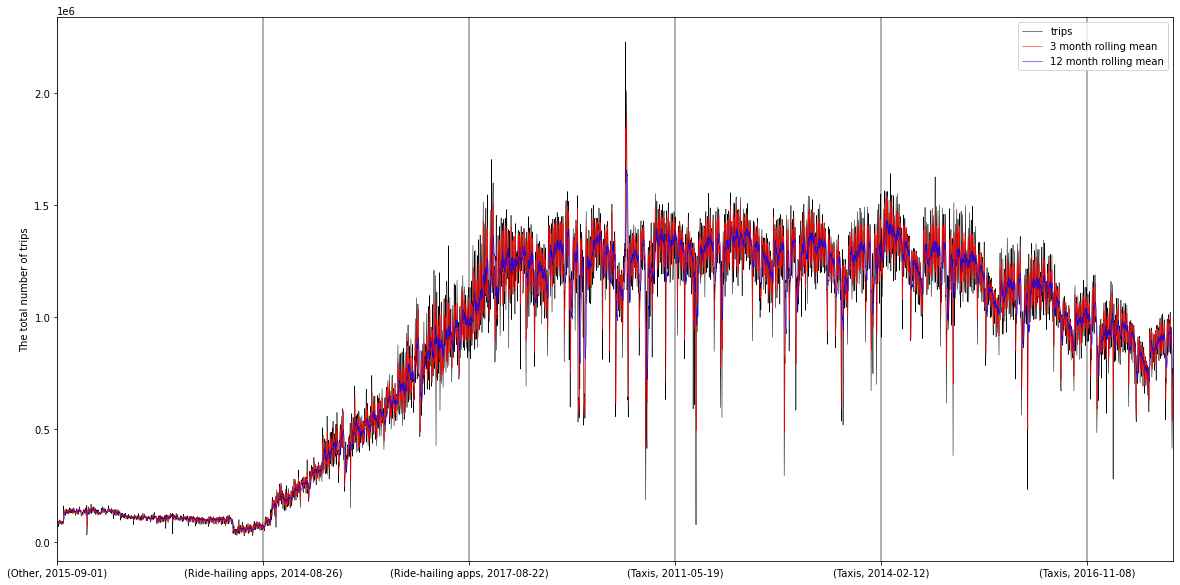

In [0]:
tlc_3 = tlc_sub2.rolling(3).mean()
tlc_12 = tlc_sub2.rolling(12).mean()

ax = tlc_sub2.plot(y="trips", label="trips", color="k", figsize=[20,10], lw=0.5)
tlc_3.plot(y="trips", label="3 month rolling mean", color="red", ax=ax, lw=0.5)
tlc_12.plot(y="trips", label="12 month rolling mean", color="blue", ax=ax, lw=0.5)
ax.grid(axis="x", which="major", lw=2)
ax.grid(axis="x", which="minor", lw=0.5)
ax.set_xlabel("")
ax.set_ylabel("The total number of trips")


In [0]:
# -- what is the relationship between Taxis and Ride-hailing alternatives in NYC?
# -- calculate Pearson correlation coefficient
print(tlc_12.corr())
print("Answer to the first question: Taxis and Ride-hailing are correlated (in NYC)")

                         trips   monthly  monthly_is_estimated
trips                 1.000000  0.976547             -0.025156
monthly               0.976547  1.000000             -0.006741
monthly_is_estimated -0.025156 -0.006741              1.000000
Answer to the first question: Taxis and Ride-hailing are correlated (in NYC)


In [0]:
# is there periodicity in the (various kinds of) trip data?
tlc_short = tlc_sub2 - tlc_12
print(tlc_short)

                               trips        monthly  monthly_is_estimated
parent_type date                                                         
Other       2015-09-01           NaN            NaN                   NaN
            2015-09-02           NaN            NaN                   NaN
            2015-09-03           NaN            NaN                   NaN
            2015-09-04           NaN            NaN                   NaN
            2015-09-05           NaN            NaN                   NaN
...                              ...            ...                   ...
Taxis       2017-12-27 -85915.750000 -302304.833333                   0.0
            2017-12-28   1117.916667 -467913.333333                   0.0
            2017-12-29  12840.583333 -656440.583333                   0.0
            2017-12-30 -57363.750000 -902392.333333                   0.0
            2017-12-31 -44007.250000 -985488.333333                   0.0

[5419 rows x 3 columns]


Text(0, 0.5, 'The total number of rides')

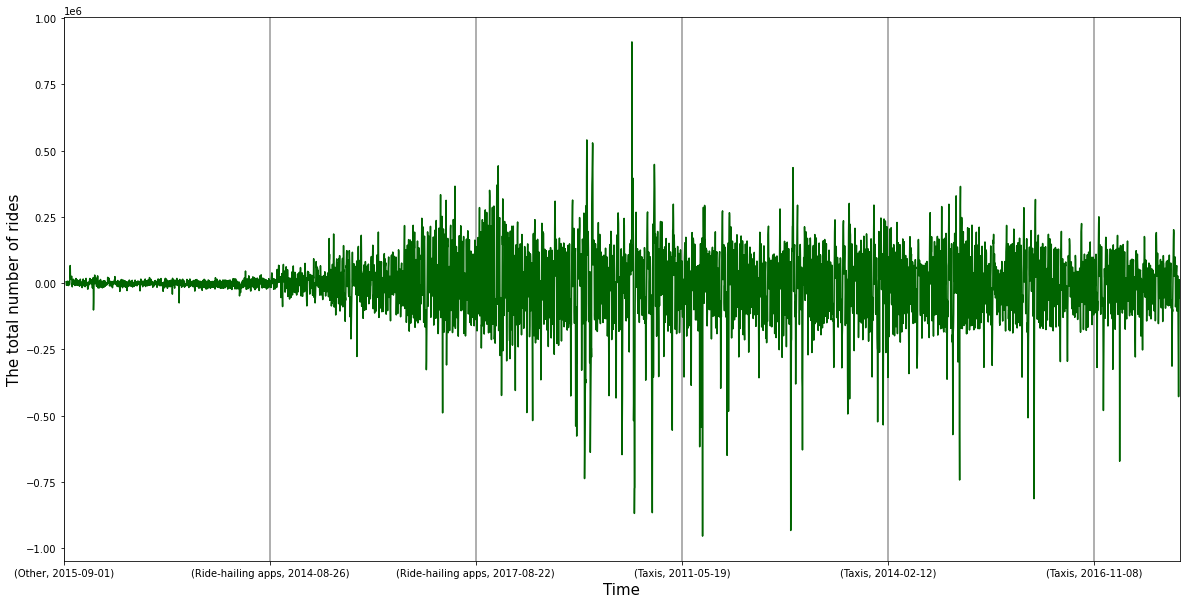

In [0]:
ax = tlc_short.plot(y="trips", legend=False, color="darkgreen", figsize=[20,10])
ax.grid(axis="x", which="major", lw=2)
ax.grid(axis="x", which="minor", lw=0.5)
ax.set_xlabel("Time", fontsize=15)
ax.set_ylabel("The total number of rides", fontsize=15)


In [0]:
print("Answer to the second question: There does seem to be some periodicity in this time series")

Answer to the second question: There does seem to be some periodicity in this time series


(0.0, 24.0)

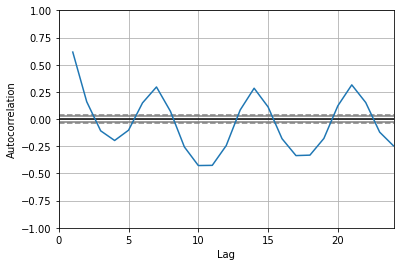

In [0]:
ax = pd.plotting.autocorrelation_plot(tlc_short["trips"].dropna())
ax.set_xlim(0,24)

In [0]:
for ii in np.arange(60):
  cc = tlc_short["trips"].autocorr(ii)
  print("lag, C : {0}, {1}".format(ii, cc))

lag, C : 0, 1.0
lag, C : 1, 0.6162828080877646
lag, C : 2, 0.1596089457242964
lag, C : 3, -0.10804935582659332
lag, C : 4, -0.19692962782608572
lag, C : 5, -0.10211702789467778
lag, C : 6, 0.14908817356731682
lag, C : 7, 0.2956980026116951
lag, C : 8, 0.07168334742338063
lag, C : 9, -0.2567136518593783
lag, C : 10, -0.4283529233621742
lag, C : 11, -0.42656670754531306
lag, C : 12, -0.2444717840553119
lag, C : 13, 0.0834483396758327
lag, C : 14, 0.2844262567711166
lag, C : 15, 0.11213636621111735
lag, C : 16, -0.18085793655956342
lag, C : 17, -0.33662293929041975
lag, C : 18, -0.33255941580387
lag, C : 19, -0.17862241773700488
lag, C : 20, 0.12216596436478667
lag, C : 21, 0.3154595741799851
lag, C : 22, 0.15256967761478893
lag, C : 23, -0.12057709692083171
lag, C : 24, -0.24804026959102718
lag, C : 25, -0.22825979735258745
lag, C : 26, -0.07413476308143652
lag, C : 27, 0.23619691117052974
lag, C : 28, 0.4384771009712769
lag, C : 29, 0.2681491169590973
lag, C : 30, -0.02262155602879906
l

### PART 4 – Summary of Findings **(10 points)**




**Summarize (no more than 500 words) your findings in this notebook by briefly reviewing the summary of the data set that you developed in Part 2 and provide answers to the two questions in Part 3 using the quantitative metrics and visualizations that you found as evidence to support your claims.  As always, include a description of limitations and potential biases in your analysis.**

In [0]:
print("range of trips = [{0}, {1}]".format(np.min(tlc["trips"]), np.max(tlc["trips"])))
print("mean of trips = {0}".format(np.mean(tlc["trips"])))
print("median of trips = {0}".format(np.median(tlc["trips"])))
print("standard deviation of trips = {0}".format(np.std(tlc["trips"])))

range of trips = [0.0, 849414.0]
mean of trips = 89900.52137891078
median of trips = 15639.5
standard deviation of trips = 147211.7897423304


Text(0, 0.5, 'total number of rides')

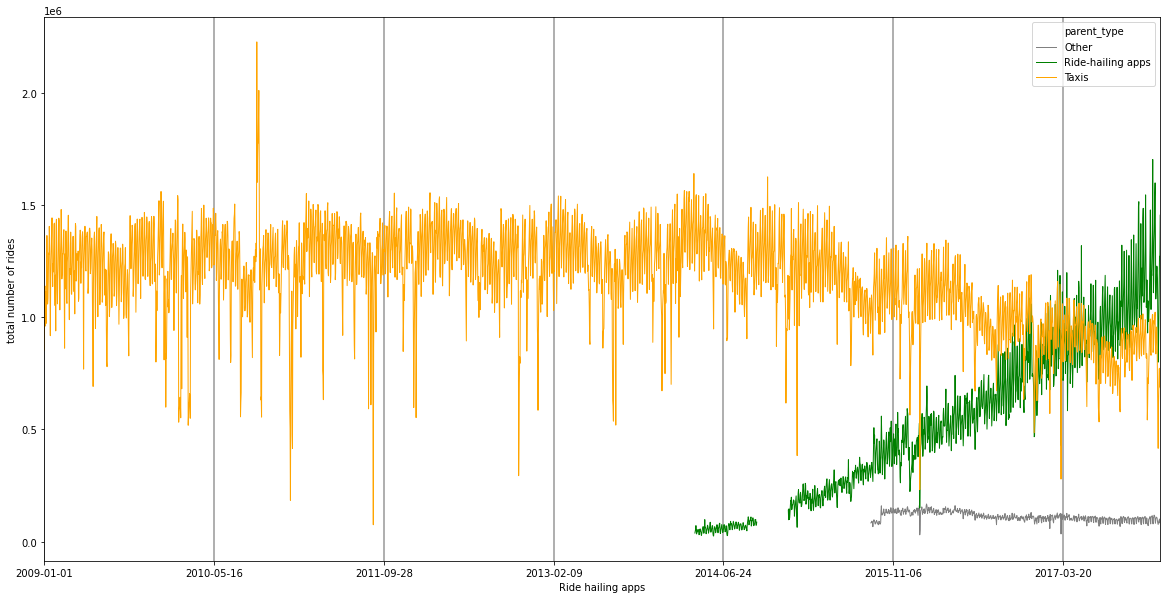

In [0]:
tlc_sub2 = tlc.groupby(["parent_type", "date"]).sum()
ax = tlc_sub2.unstack('parent_type').plot(y="trips", legend=True, color=["gray","green","orange"], figsize=[20,10], lw=1)
ax.grid(axis="x", which="major", lw=2)
ax.grid(axis="x", which="minor", lw=0.5)
ax.set_xlabel("Ride hailing apps")
ax.set_ylabel("total number of rides")

As dscribed in the backgournd, the RHS became predominant in transportation sector, their effects on traditional taxis is reported to be significantly large in urban environments ([Clewlow, & Mishra, 2017](https://escholarship.org/uc/item/82w2z91j); [Cramer, & Krueger, 2016](https://www.aeaweb.org/articles?id=10.1257/aer.p20161002); [Clewlow, & Mishra, 2017](https://escholarship.org/uc/item/82w2z91j)). 

The NYC TLC data is showing the types of cars that riders used in New York City from 2009 to 2017. According to the NYC TLC data, the total number of rides is ranged from 0 to 849,414. The average number of ride is around 89,900. Also, the standard deviation is 147,211.

As the figure shown above, total number of rides of Taxis has been decreased after the ride-halling apps was introduced in 2014. In March, 2017, the ride-halling apps exceed the total number of using Taxis. Therefore, it is tue that the RHS effects on traditional taxis as reported in the previous research.

However, there are still limitations in the research that other transportation sector such as subway and city bus, and age of users were not considered in analysis. Also, periodicity was found in the research that the data should be analyzed considering the time effects. In the future, more research are expected to be conducted considering various factors such as other transportation sector, characteristics of consumers, and so on.    
